# 머신러닝을 활용한 모델 기반 협업 필터링

## 모델 기반 협업 필터링이란?

### 기존 이웃 기반 CF

유저 $u \in U$, 아이템 $i \in I$에 대해 평점 데이터 $r(u, i)$가 존재할 때, 유저 $u$의 아이템 $i$에 대한 평점을 예측한다면,

1) User-based : 아이템 $i$에 대한 평점이 있으면서 유저 $u$와 유사한 유저들의 집합을 $\varOmega_{i}$라 한다면,

$\hat{r}(u,i) = \frac{\sum_{u' \in \varOmega_{i}} sim(u, u') \cdot r(u', i)}{\sum_{u' \in \varOmega_{i}} sim(u, u')}$

2) Item-based : 유저 $u$가 평가를 한 다른 아이템 중에서 아이템 $i$와 유사한 아이템들의 집합을 $\varPhi_{u}$라한다면,

$\hat{r}(u,i) = \frac{\sum_{i' \in \varPhi_{i}} sim(i, i') \cdot r(u, i')}{\sum_{i' \in \varPhi_{i}} sim(i, i')}$

- `Memory-based CF`라고도 불리며, 유저와 아이템을 직접 연관시켜 추천하기 때문에 설명력이 높고 적용이 용이합니다.
- 특징
    - 구현이 쉽고 간단
    - 유저-아이템 간의 `유사도`에 크게 의존
    - 데이터의 `Sparsity`에 매우 취약 $\to$ 그러나 대부분의 Real World의 데이터는 `Sparse`합니다
    - 추천 결과를 생성할 때마다 많은 연산은 요구 $\to$ 유저, 아이템이 늘어날 수록 확장성`Scalability`이 떨어집니다.


- 기존엔 있는 데이터를 기반으로 했다면, 이번엔 `Deep Learning` 기반으로 추천하여 문제를 극복합니다.

### Model-based Collaborative Filtering 특징

#### Parametric Machine Learning

- 주어진 데이터를 사용하여 모델을 학습합니다
- 데이터의 정보가 데이터 패턴`Parameter`의 형태로 모델에 압축됩니다
- 지속적인 최적화`Optimization`을 통해 업데이트합니다 $\to$ `Machine Learning` 방식

#### 데이터의 패턴 = 유저-아이템의 '잠재적' 특성

- `이웃 기반 CF`는 유저-아이템 벡터를 데이터를 통해 '계산'된 형태로 저장하고 있습니다
- 반면, `Model-based CF`의 경우 유저, 아이템 벡터는 모두 '학습'을 통해 변하는 `Parameter`가 됩니다

#### Real World에서는 Matrix Factorization 기법이 가장 많이 사용

- 최근에 `MF` 원리를 `Deep Learning`에 응용한 모델이 더 높은 성능을 냅니다.
- 그렇다고 하지만 현업에서 자주 사용되진 않고 논문에 주로 사용된다고 합니다.

### Model-based Collaborative Filtering의 장단점


#### 모델의 학습/서빙

- 유저-아이템 데이터는 학습에만 사용되고, 학습된 모델은 '압축'된 형태로 저장이 됩니다
- 그래서 이미 학습된 모델을 통해 추천 결과를 서빙하기 때문에 속도가 빠릅니다

#### Sparsicty/Scalability 극복

- `이웃 기반 CF`에 비해 `sparse`한 데이터에서도 좋은 성능을 보입니다 $\to$ 가지고 있는 데이터만으로 학습해서 결과를 예측하기 때문!
- 사용자, 아이템 개수가 늘어나도 마찬가지로 좋은 성능을 보입니다

#### Overfitting 방지

- `이웃 기반 CF`와 비교했을 때 전체 데이터의 패턴을 학습하도록 모델이 작동해서 편향적인 예측 결과를 방지합니다

#### LImited Coverage

- `이웃 기반 CF`의 경우 공통의 유저 / 아이템을 많이 공유해야만 `유사도` 값이 정확해집니다
- `유사도` 값이 정확하지 않은 경우 이웃의 효과를 보기 어려운 반면, 공유가 안되더라도 학습이 잘됩니다

### Rating Matrix(Explicit Feedback)

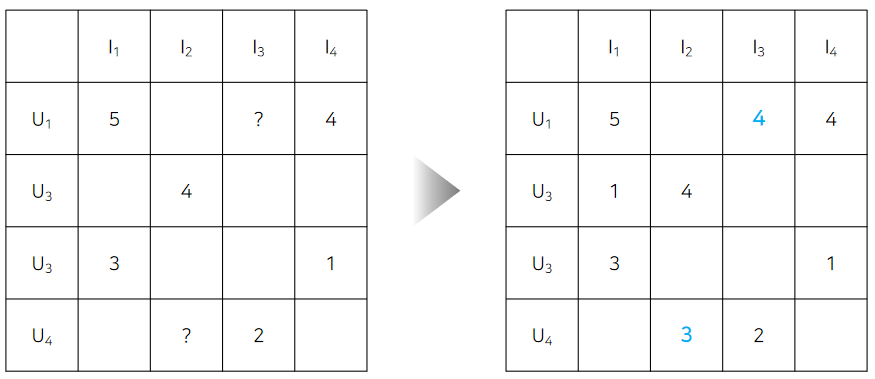

- 주어진 `Matrix`에 평점을 기반으로 유저가 아이템에 '주게 될' 평점을 예측합니다

### User-item Matrix(Implicit Feedback)

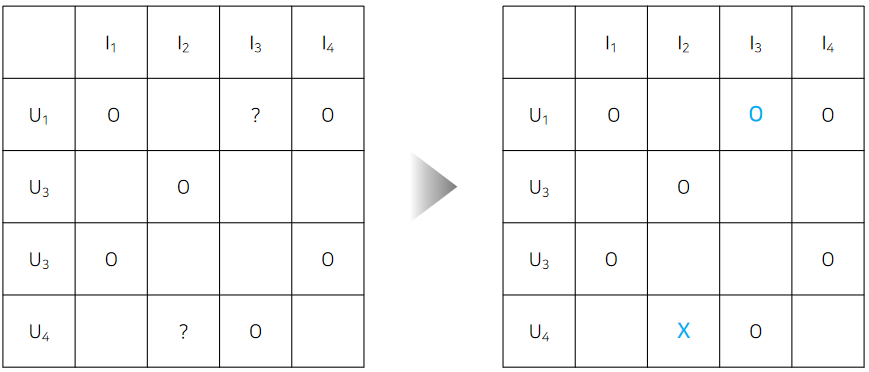

- 이 경우엔 몇몇 아이템에 흥미를 가져서 '클릭'을 했습니다
- 그리고 '클릭'을 안한 아이템에 대해서(관심이 없거나 또는 노출이 안되었거나) '클릭'을 하게될 것인가 아닌가에 대한 '예측'을 합니다

## Latent Factor Model과 Singular Value Decomposition

### Latent Factor Model

- 유저와 아이템을 잠재적 요인을 사용해 표현할 수 있다고 보는 모델입니다
    - 다양하고 복잡한 유저와 아이템들의 특성을 몇 개의 벡터로 `compact`하게 표현하며 이를 `Representation`이라고도 합니다
- 유저와 아이템을 같은 차원에 `투영`하여 벡터로 표현하여 나타냅니다
    - 차원의 개수는 여러개
    - 각 차원의 의미는 모델 학습을 통해 생성되며, 표면적으로 무엇을 의미하는지 알 수가 없습니다
- 같은 벡터 공간에서 유저와 아이템 벡터가 놓일 경우 유저와 아이템 유사한 정도를 알 수 있습니다



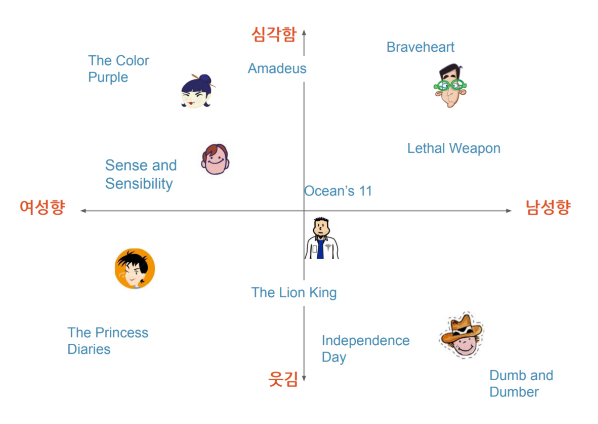

- 유저와 아이템을 같은 차원에 투영한 결과를 기반으로 추천을 제공하게 됩니다

### Singular Value Decomposition(SVD)

- Rating Matrix $R$에 대해 유저와 아이템의 잠재 요인을다포함할 수 있는 행렬로 분해합니다
    1. 유저 잠재 요인 행렬
    2. 잠재 요인 대각 행렬
    3. 아이템 잠재 요인 행렬
- 행렬 분해 방식으로, 차원을 축소해서 수백, 수억 차원짜리를 압축`compact`합니다
    - 선형 대수학에서 차원 축소 기법 중 하나로 분류됩니다
    - 주성분분석`PCA`도 차원 축소 기법 중 하나입니다
    - 선형 대수학에선 이를 `Demension Reduction Model`이라고도 불립니다
- 실제 Netflix Prize에서 추천 시스템에 적용된 단일 알고리즘으로 가장 좋은 성능을 보인다고 합니다
    - 현재는 `SVD` 원리를 차용하되, 다양한 최적화 기법을 적용한 `MF`가 더 많이 사용 됩니다 $\to$ `SGC`, `ALS`, `BPR` 등

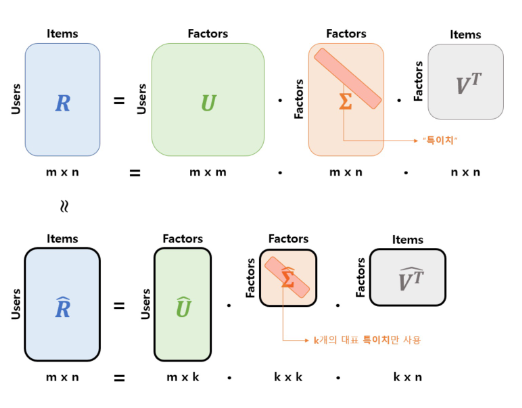

#### Full SVD : $R = U \varSigma V^{T}$
- $U$ : 유저의 `Latent Vector`
    - $U$의 열`column` 벡터는 $R$의 '좌측' 특이치 벡터`Singular Vector`
- $V$ : 아이템의 `Latent Vector`
    - $V$의 열`column` 벡터는 $R$의 '우측' 특이치 벡터`Singular Vector`
- $\varSigma$ : `Latent Vector`의 중요도
    - $RR^{T}$을 '고유값 분해'해서 얻은 직사각 대각 행렬로, 대각 원소들은 $R$의 특이치`Singular Value`입니다
    - 여기서 직사각 대각 행렬은 강조 표시된 부분에 각 아이템의 중요도를 내림차순으로 기입되 있습니다
- 참고(선형 대수학 관련 수식)

    $UU^{T} = I$, $V^{T}V = I$ ($U$, $V$는 직교행렬)

    $RR^{T} = U(\varSigma\varSigma^{T})U^{T}$

    $R^{T}R = V(\varSigma^{T}\varSigma)V^{T}$

#### Truncated SVD : $R = U\varSigma V^{T} \approx \hat{U} \varSigma_{k} \hat{ V^{T}} = \hat{R}$
- 대표 값으로 사용된 `k` 개의 특이값`Sigular Value`만 사용하며, `k`는 하이퍼 파라미터입니다 $\to$ 직접 설정해서 적절한 값을 찾아야 함
- 평점 예측 결과인 $\hat{R}$은 축소된 $\hat{U},\varSigma_{k},\hat{V^{T}}$에 의해 계산됩니다

#### 수행의 목적과 이유
- 최종적으로 $R$이랑 비슷한 $\hat{R}$을 만들어 적절한 결과를 유추합니다
- 두 수치가 조금 다르지만, `truncate`를 통해 결과에 영향을 크게 주지 않는 선에서 퍼포먼스 성능을 이끌어 낼 수 있습니다 $\to$ `k`가 너무 크면 성능이 그대로, 너무 작으면 결과가 달라짐
- `k`개의 Latent Factor의 의미는 유추할 수 있지만, 정확히 어떤 특성을 가지는지는 알 수가 없습니다 $\to$ 선호하는게 무엇이구나 정도만 알 수 있음

### SVD 문제점

- 분해`Decomposition`하려는 행렬의 Knowledge가 불완전하면 정의되지가 않습니다
    - 그래서 `sparsity`가 높은 데이터의 경우 결측치가 매우 많고, 실제 데이터는 대부분 `sparse matrix`입니다
- 그래서 결측된 entry를 모두 채워`Imputation`, `Dense matrix`를 만들어 `SVD`를 수행하게 됩니다
    - `Imputation`은 데이터 양을 상당히 증가 시켜 결국 퍼포먼스 비용이 높아집니다
    
    ex. 결측된 entry를 `0`이나 `유저/아이템의 평균 평점`으로 채움

- 정확하지 않은 `imputation`은 데이터를 왜곡시키고, 예측 성능을 떨어뜨립니다
    - 행렬의 entry가 적을 때 `SVD` 적용 시 과적합`overfitting`되기 쉬움
- 따라서, `SVD` 원리를 차용하되, `MF`를 학습하기 위한 '근사적'인 방법을 활용합니다 $\to$ Full `SVD`부터 시작하는게 아니라, 처음부터 `k`개의 정해 놓은 차원으로 시작하는 방식

### SVD와 Matrix Factorization(MF)

- $R$ = $PQV^{T}$

##  Matrix Factorization

- 행렬을 분해한다는 뜻입니다
- 실제 `Matrix Factorization`의 구현은 유저 matrix, 아이템 matrix 2개로 이루어졌습니다
- `SVD`로 분해된 행렬의 $\varSigma$를 $U$나 $V^{T}$에 곱해서 흡수시키면 `MF`와 동일합니다

    $(N \times K) \times (K \times K) \times (K \times M) = (N \times K) \times (K \times M)  = (N \times M)$

    $R \approx U\varSigma_{k} V^{T} \
    = (U\varSigma_{k}) V^{T} \
    = U(\varSigma_{k}) V^{T}
    $

    $\hat{r_{u,i}} = \varSigma_{k} u_{ik}s_{kk}v_{kj}$

    $ = \varSigma_{k} (u_{ik}s_{kk})v_{kj} = \varSigma_{k} u_{ik}'v_{kj} = u_{i}'^{T} v_{j}$

    $ = \varSigma_{k} u_{ik}(s_{kk}v_{kj}) = \varSigma_{k} u_{ik} v_{kj}' = u_{i}^{T} v_{j}'$


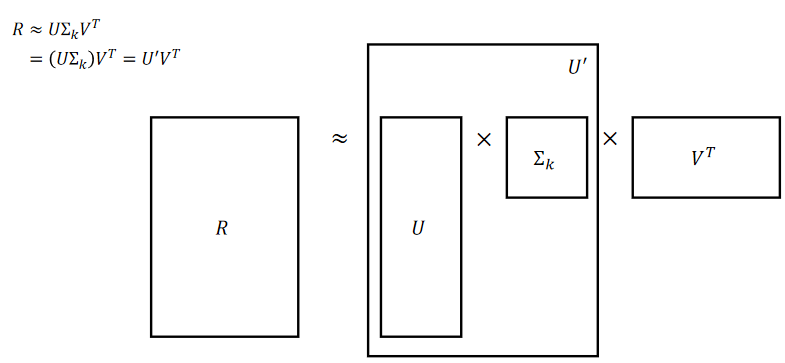

- `Rating Matrix`를 유저 Factor`P`와 아이템 Factor`Q`로 분해

 $R \approx P \times Q^{T} = \hat{R}$

 $P \to \lvert U \rvert \times k$

 $Q \to \lvert I \rvert \times k$

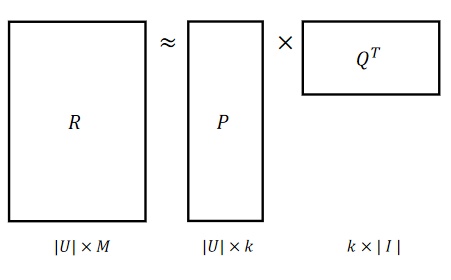

- 평점 예측치 : $\hat{r_{u, i}} = p_{u}^{T} q_{i}$
- `MF` 학습 : $R$과 $\hat{R}$이 최대한 '유사'하도록 `X`, `Y`를 학습하는 과정이라 보면 됩니다
    - `true rating` : $r_{u, i}$
    - `predicted rating` : $\widehat{r_{u,i}} = p_{u}^{T}q_{i}$

 $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - p_{u}^{T} q_{i})^{2}$

- 위 최적화 함수`Objective Function`의 수치를 '최소화'하여 가장 근사한 학습 파라미터 `p`와 `q`의 값을 구하는 것을 목표로 합니다
- 또한 적절한 `k` 값을 구해서 과적합`overfitting`을 방지하는 것도 목표에 추가됩니다.
- 여기서 `observed`는 유저와 아이템 값이 관측된 값만 대응한다는 의미입니다

> Objective Function = Cost/Loss Function?
- [Objective Function, Loss Function, Cost Function의 차이](https://ganghee-lee.tistory.com/28)

### Objective Function

 $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2})$

- $\lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{u} \rVert _{2}^{2})$가 추가될 경우 정확도가 좀더 높아지기 때문에 필수적으로 들어갑니다
- $r_{u,i}$ :학습 데이터에 있는 유저 $u$의 아이템 $i$에 대한 `true rating`
- $p_{u}$ : 유저 $u$의 `latent vector`, $q_{i}$ : 아이템 $i$의 `latent vector`
    - 최적화 문제를 통해 지속적으로 업데이트되는 파라미터
- 
- 실제 관측된 데이터만을 사용하여 모델을 학습합니다
    - 기존 `SVD`는 행렬 분해를 위해 결측 entry에 값을 채워 넣은 반면, `MF`는 관측된 데이터만을 기반으로 위 수식을 추가해 정확도를 높입니다
- 여기서 $\lambda$는 `L2 Regularization`을 의미합니다
    - 학습 데이터 과적합`overfitting`을 방지
- $\lVert p_{u} \rVert _{2}^{2}$ : 노름`norm`을 제곱한 값으로, $P$ 매트릭스의 모든 요소의 제곱을 더한 값을 루트`sqrt`시킨 값을 다시 제곱한 값입니다. `L2 norm`이라고도 볼리며 유클리드 노름`euclidean norm`이라고도 합니다

#### 정규화(Regularziation)란?

- 학습 데이터에 지나치게 과적합`overfitting`되는 경우 `weight` 값이 커지게 됩니다 $\to$ `weight`의 크기를 손실 함수`loss function`에 넣어주면 `weight`에 제한을 걸게 되어, `weight` 값이 지나치게 커지는 것을 방지할 수 있음
- `Regularization Term`에 곱해지는 $\lambda$에 크기에 따라 영향도를 다르게 줄 수 있습니다
    - $\lambda$가 너무 크면 `weight`가 제대로 변하지 않아 `underfitting`이 일어 날 수도 있으니 적당한 값을 취해야 합니다
- 대표적인 방법으론 `L1`, `L2` 정규화가 있습니다
- 보통 `L2`가 많이 사용됩니다
- L1 : 

 $L(w) = s\sum_{i=1}(h_{w}(x^{(i)} - y^{i})^{2} + \lambda\sum_{j}\lvert w_{j} \rvert$

- L2 : 

 $L(w) = s\sum_{i=1}(h_{w}(x^{(i)} - y^{i})^{2} + \lambda\sum_{j} w_{j}^{2}$

- 클래식한 `machine learning`에선 필수적인 요소입니다

### Stochastic Gradient Descent(SGD) in MF


- `true rating`과 예측된 rating`predicted rating`의 차이를 에러로 정의합니다




- 오차`Error` : $e_{ui} = r_{ui} - p_{u}^{T} q_{i}$
- 기울기`Gradient` : $ \frac{\partial a}{\partial p_{u}} =  \frac{\partial(r_{ui} - p_{u}^{T}q_{i})^{2}}{\partial{p_{u}}} + \frac{\partial \lambda \lVert p_{u} \rVert_{2}^{2}}{\partial p_{u}} = -2(\partial(r_{ui} - p_{u}^{T}q_{i})q_{i} + 2\lambda p_{u} = -2(e_{ui} q_{i} - \lambda p_{u}) $

- 기울기`gradient`의 반대 방향으로 $p_{u}$, $q_{i}$를 업데이트합니다

 $p_{u} \gets p_{u} - \eta \cdot (e_{ui} q_{i} - \lambda p_{u})$
 
 $q_{i} \gets q_{i} - \eta \cdot (e_{ui} p_{u} - \lambda q_{i})$

- 여기서 $\eta$는 `learning rate`입니다

#### Gradient Descent 예시

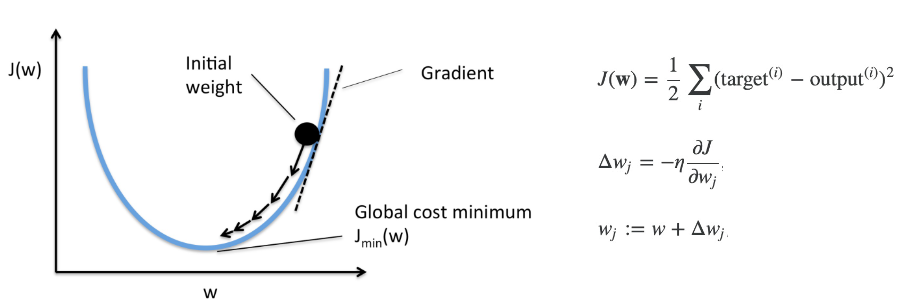

- `w` : 하나의 학습 파라미터(여기선 파라미터를 하나라 가정합니다)
- $J(w)$ : `Objective Function`
- $ \Delta w_{j} $ : `Objective Function` 기울기 값에 `learning rate`를 곱한 값
- $w_{j}$에 $\Delta w_{j} $ 값을 빼면 점점 오차`error`가 줄어들면서 최적화된 결과를 도출할 수 있게 합니다
- 결국, 모든 파라미터에 수식을 적용하여 모든 값에 대한 오차`error`를 줄이면서 최적화된 결과를 구할 수 있게 합니다

### Adding Biases

- Objective Function

 $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2})$

 - Bias 추가

 $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - \mu - b_{u} - b_{i}  - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2} + b_{u}^{2} + b_{i}^{2})$


- 전체 평균 $\mu$, 유저의 bias $b_{u}$, 아이템의 bias $b_{i}$를 추가하여 예측 성능을 높입니다
- 이를 통해 아이템에 대한 유저의 '편향'에 대응할 수 있게 됩니다
    - 어떤 유저는 모든 영화에 대해서 평점을 짜게 줄 수도 있음
- 실제로 적용하니 성능이 확 올랐다고 합니다

- 오차`Error`
 
 $e_{ui} = r_{ui} - \mu - b_{u} - b_{i} - p_{u}^{T} q_{i}$

- 기울기`Gradient`는 반대 방향으로 $b_{u}$다 $b_{i}$,$c_{u}$,$y_{i}$를 업데이트합니다($\gamma$는 `learning rate`)

 $ b_{u} \gets b_{u} + \gamma \cdot (e_{ui} - \lambda b_{u})$

 $ b_{i} \gets b_{i} + \gamma \cdot (e_{ui} - \lambda b_{u})$

 $ p_{u} \gets p_{u} + \gamma \cdot (e_{ui}q_{i} - \lambda p_{u})$
 
 $ q_{i} \gets q_{i} + \gamma \cdot (e_{ui}p_{u} - \lambda q_{i})$

### Page Review

- 해당 개념에 대한 내용의 논문
- [Matrix Factorization Techniques For Recommender System](https://datajobs.com/data-science-repo/Recommender-Systems-%5bNetflix%5d.pdf)

### Temporal Dynamics

- 시간에 따라 변하는 유저, 아이템의 특성을 반영할 때 사용합니다
    - 아이템이 시간에 지남에 따라 인기도가 저하됨
    - 유저가 시간이 흐르면서 평점을 내리는 기준이 엄격해짐
- 시간을 반영한 평점 예측
    - 학습 파라미터가 시간을 반영하도록 모델을 설계합니다

 $\widehat{r_{ui}(t)} = \mu + b_{u}(t) + b_{i}(t) + p_{u}^{T}q_{i}(t)$

- 자주 활용하지는 않습니다
- 하지만, 시간에 따른 예측도 고려해야 하는 것은 사실입니다
- 그래서 `research` 쪽에선 활용되나, 실제로 적용되는 경우는 거의 없습니다


### Inputs with Varying Confidence Level

 $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}c_{u,i}(r_{u, i} - \mu - b_{u} - b_{i}  - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2} + b_{u}^{2} + b_{i}^{2})$

- 기존 `bias`가 추가된 `MF`에 신뢰도 $c_{u,i}$를 추가한 `objective function`입니다
- $c_{u,i}$ : $r_{u,i}$에 대한 `신뢰도`를 의미하며, 모든 평점이 동일한 `신뢰도`를 가지지 않습니다
- 노출이 많은 아이템은 `신뢰도` 값을 내리고, 적게 등장한 아이템은 올리는 방식으로 다양한 아이템에 신뢰도를 부여하여 예측도를 높입니다
    - 대규모 광고 집행과 같이 특정 아이템이 많이 노출되어 클릭되는 경우
    - 유저가 아이템에 대한 평점이 정확하지 않은 경우 $\to$ `Implicit Feedback`

#### Page Review


- [Implicit Feedback 데이터에 적합하도록 MF 모델을 설계하여 성능을 향상시킨 논문](yifanhu.net/PUB/cf.pdf)
- Implicit Feedback 데이터를 모델에 적용하려면 필수적으로 읽어봐야할 논문 $\to$ 적용 방법의 시초

### Alternative Least Square(ALS)

- Basic Concept
 1. 유저와 아이템 매트릭스를 '번갈아' 가면서 업데이트
 2. 두 매트릭스 중 하나를 `상수`로 놓고, 나머지 매트릭스를 업데이트
 3. $p_{u}$, $q_{i}$ 중 하나를 `상수`로 고정, 이렇게 되면 $p_{u}q_{i}$가 2차 함수가 되는데 이것을 `least-square`문제로 풀이
- `Sparse`한 데이터에 대해 `SGD`보다 `robust`한 모습을 보입니다
- `SGD`와 다르게 `병렬 처리`가 가능하여, `spark` 같은 분산 처리 시스템에서 대용량 데이터에 대해 빠르게 학습이 가능합니다

#### Solving ALS by Matrix Multiplication

- $p_{u}$나 $q_{i}$를 상수로 고정하면 `objective function`가 `quandratic form`이 되어 `convex`

  $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2})$

- 해당 수식에 $r_{u, i} - p_{u}^{T} q_{i}$부분이 (`상수` + `상수`$x$)가 되면서 2차 함수로 변환이 된다는 의미입니다 $\to$ 연산이 쉬워짐
- 아래의 수식을 사용해 $P$, $Q$를 번갈아 가면서 업데이트를 수행합니다

 $p_{u} = (Q^{T}Q + \lambda I)^{-1}Q^{T}r_{u}$

 $q_{i} = (P^{T}P + \lambda I)^{-1}P^{T}r_{i}$

### Using Preference/Confidence

- Implicit Feedback을 처리하는 방법입니다.
- 평점`Rating`을 `Preference`와 `Confidence` 형태로 바꿔서 목적 함수`Objective Function`에 적용합니다.


**Preference**
- 아이템 클릭 같은 `Implicit Feedback`을 어떤 수치로 넣기가 애매합니다.
    - 아이템 클릭 횟수를 기준으로 하기도 애매
- 그래서 유저 $u$가 아이템 $i$를 얼마나 선호하는지 여부를 `binary`로 표현합니다.

 $f_{ui} = \begin{cases}
 1, r_{ui} > 0 \\
 0, r_{ui} = 0 \\
 \end{cases}$

**Confidence**
- 하지만 `preference`로만 표현하는데에는 '얼마나' 선호하는지를 알 수가 없습니다.
- `confidence`라는 `increasing function`을 통해 이를 해결합니다.
- 여기서 $\alpha$는 positive feedback과 negative feedback 간의 상대적인 중요도를 조정하는 `하이퍼 파라미터`입니다.

 $c_{ui} = 1 + \alpha \cdot r_{ui}$

- $c_{ui}$와 실제 평점 $r_{ui}$과 $\alpha$에 의해 결정되는 상수`constant`이므로 학습 알고리즘의 로직은 바뀌지 않습니다.

**기존 ALS Objective Function**

- $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}(r_{u, i} - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2})$

**Preference와 Confidence가 적용된 Objective Function**

- $\underset{P, Q}{min} \sum_{\text{observed r}_{u, i}}c_{u,i} (f_{u, i} - p_{u}^{T} q_{i})^{2} + \lambda(\lVert p_{u} \rVert _{2}^{2} + \lVert q_{i} \rVert _{2}^{2})$

- `SGD`나 `ALS`를 통해 동일하게 풀 수가 있습니다.
- 해당 논문에서는 `ALS` 매트릭스 연산을 통해 보다 효율적으로 연산하는 방법을 제안하고 있습니다.

**기본 Objective From**

 $p_{u} = (Q^{T}Q + \lambda I)^{-1}Q^{T}r_{u}$

 $q_{i} = (P^{T}P + \lambda I)^{-1}P^{T}r_{i}$

**Confidence/Preference 분리**

 $p_{u} = (Q^{T}C^{u}Q + \lambda I)^{-1}Q^{T}C^{u}f_{u}$

 $q_{i} = (P^{T}C^{i}P + \lambda I)^{-1}P^{T}C^{i}f_{i}$


- 여기서 $C$는 $c_{ui} = 1 + \alpha \cdot r_{ui}$의 매트릭스입니다.

## [BPR Optimization With MF(Skip 가능)](https://arxiv.org/pdf/1205.2618.pdf?source=post_page)


- `Beayesian` 기반 추천 시스템
- 사용자의 클릭, 구매 등의 로그는 `Implicit Feedback` 데이터입니다
 - 평점`Rating`과 같이 아이템에 대한 선호가 분명하게 드러나지 않음
- `Implicit Feedback` 데이터의 경우 0/1 binary로 이뤄져 있습니다,
 - 일반적으로 유저가 아이템을 클릭/구매할 확률을 예측하는 문제
 - 논문에서는 `RMSE`가 아닌 `AUC`(0과 1을 Classification할 때 사용하는 성능 지표)를 모델 성능 지표로 비교합니다.
- `Ranking`을 고려한 최적화입니다.
 - 유저가 아이템 $i$보다 $j$를 좋아할 경우, 이 정보를 활용해 `MF`의 파라미터를 학습합니다.
 - 유저 $u$에 대해 아이템 $i$ > 아이템 $j$라면 이는 유저 $u$의 `Personalized Ranking`이라 할 수 있습니다.

### Beayesian Personalized Ranking(BPR)

- 사용자에게 순서`Ranking`가 있는 아이템 리스트를 제공하는 문제입니다.
 - 아이템 추천 문제와 동일
- `Implicit Feedback` 데이터만을 통해서 추론해야 합니다.
 - `Implicit Feedback` 추천 시스템은 'positive observation'만 존재 $\to$ 보았다, 클릭했다, ...
- 그래서, 관측되지 않은 데이터에 대해서 아래 두 가지를 모두 고려할 수 있게 합니다.
 1. 유저가 아이템에 관심이 없는 것인가
 2. 유저가 실제로 관심이 있으나 아직 보질 못한 것인가

- 결국 `MF`를 적용한 추천 시스템을 만들 때, 이 `BPR` 문제를 활용하는 것이라 보면 됩니다.


#### 활용 방식

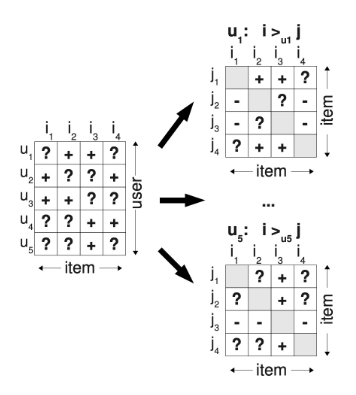

**Analysis of the problem setting**
- 가정
 1. 관측된 item을 관측되지 않은 item보다 선호
 2. 관측된 아이템끼리는 선호도를 추론할 수 없음
 3. 관측되지 않은 아이템끼리도 선호도를 추론할 수 없음
- 특징
 1. 관측되지 않은 item들에 대해서도 정보를 부여하여 학습
 2. 관측되지 않은 item들에 대해서도 `ranking`이 가능
- 학습 데이터 생성
 - 유저 $u$가 선호하는 아이템들을 $I_{u}^{+}$일 경우.
  
  $D_{s}:=\{(u,i,j)|i \in I_{u}^{+} \land j \in I \backslash I_{u}^{+}\}$ 
 
- 유저 $U_{1}$의 선호도 데이터 예시
  
  $I_{2} >_{u1} i_{1}, I_{3} >_{u1} i_{1} \\
   I_{2} >_{u1} i_{4}, I_{3} >_{u1} i_{4}$

### BPR Optimization

**최대 사후 확률 추정(Maximum A Posterior)**
- 모르고 넘어가면 알기 어려운 개념이라 추후 공부가 필요
- Beayes 정리에 의해,
 
 $p(\theta|>_{u})$ &prop; $p(>_{u}|\theta)p(\theta)$

- 사전 확률`prior` : $p(\theta)$, 파라미터에 대한 사전 정보
- 사후 확률`posterior` : $p(\theta|>_{u})$, 주어진 유저의 선호 정보에 대한 파라미터에 대한 확률
- 가능도`likelyhood` : $p(>_{u}|\theta)$, 주어진 파라미터에 대한 유저의 선호 정보에 대한 확률

 $\to$ 사후 확률`posterior`를 최대화 한다는 것은 주어진 유저 선호 정보를 최대한 잘 나타내는 파라미터를 추정하는 것


**가능도`likelyhood` : $p(>_{u}|\theta)$**
- 유저의 선호 정보 $>_{u}:=(u,i,j)$로 표현하면, 유저 선호 정보($>_{u}$)에 대한 가능도`likelyhood`

 $\prod_{u \in U} p(>_{u}|\theta) = \prod_{(u,i,j) \in D_{S}} p(i >_{u} j) = \prod_{(u,i,j) \in D_{S}} \rho (\widehat{x_{uij}}(\theta))$

- 사용자 $u$가 아이템 $i$를 $j$보다 좋아할 확률

 $p(i >_{u} j) := \rho (\widehat{x_{uij}}(\theta)) \\
 \rho(x) := \frac{1}{1 + e^{-x}}$
 - 여기서 $\rho(x)$는 `sigmoid function`. 즉, 0/1로만 구성된 $\rho$입니다.
- 유저 $u$의 벡터를 $p_u$ 아이템 $i$의 벡터를 $q_i$라고 하면,
  
 $\hat{r_{ui}} = p_{u}^{T}q_{i}\\
 \hat{r_{uj}} = p_{u}^{T}q_{j}\\
 \widehat{x_{uij}} = \hat{r_{ui}} - \hat{r_{uj}} = p_{u}^{T}q_{i} -  p_{u}^{T}q_{j}$

**사전 확률`prior` : $p(\theta)$**
- 파라미터`P`, `Q`에 대한 사전 확률은 정규분포를 따른다고 가정합니다.
 - 평균이 모두 0이고 공분산 행렬이 $\sum_{\theta}$인 정규분포
 - 공분산 행렬 $\sum_{\theta}$는 $\lambda_{\theta}I$로 설정하여 하이퍼 파라미터 개수를 조정합니다.

 $p(\theta) ~ N(0, \sum_{\theta}) = N(0,\lambda_{\theta}I)$

**정의**

$BPR-OPT\\
:= \ln p(\theta | >_{u}) \\
= \ln \prod_{(u,i,j) \in D_{S}} \sigma (\hat{x}_{uij})p(\theta)\\
= \prod_{(u,i,j) \in D_{S}} \ln \sigma (\hat{x}_{uij}) + \ln p(\theta)
= \prod_{(u,i,j) \in D_{S}} \ln \sigma (\hat{x}_{uij}) - \lambda_{\theta}\lVert \theta \rVert^{2}$

- 여기서 $\lambda_{\theta}$는 정규화`Regularization` 파라미터입니다.

**Gradient 계산**

$\frac{\partial BPR-OPT}{\partial \theta} = \sum_{(u,i,j) \in D_{S}}\frac{\partial}{\partial \theta} \ln \sigma(\hat{x}_{uij}) - \lambda_{\theta} \frac{\partial}{\partial \theta} \lVert \theta \rVert^{2}$

&prop; $\sum_{(u,i,j) \in D_{S}} \frac{-e^{-\hat{x}_{uij}}}{1 + e^{-\hat{x}_{uij}}} \cdot \frac{\partial}{\partial \theta} \hat{x}_{uij} - \lambda_{\theta} \theta$

- 해당 값을 경사 하강법`Gradient Descent` 처리합니다.

 $\theta \gets \theta - \alpha \frac{\partial BPR-OPT}{\partial \theta}$

- 하지만 일반적인 경사 하강법`Gradient Descent`은 적절하지 않아 개선이 필요합니다.

**LERNBPR(Bootstrap 기반의 SGD)**
- $D_{S}$에서 `triples`를 랜덤 샘플링한 뒤, 이를 사용해서 파라미터를 업데이트합니다.

 $D_{S}:=\{(u,i,j)| i \in I_{u}^{+} \land j \in I \backslash I_{u}^{+} \}$

- 일반적인 `GD`, `SGD`를 사용할 경우, 보통 $i$보다 $j$가 훨씬 많기 때문에 학습의 `비대칭`성이 발생하게 됩니다.
- 또한 동일한 $u$, $i$에 대해 계속 업데이트가 되서 수렴이 안되고, 결국 성능이 떨어지게 됩니다.
- 하지만, `triples` 단위로 랜덤 샘플링을 수행하면 $i$와 $j$의 `비대칭` 학습을 해소하고, 동일한 $u$, $i$가 계속 등장하지 않게 되 수렴이 잘되 성능이 우수합니다.

**Matrix Factorization 모델 적용**
- 유저 $u$의 벡터를 $p_u$, 아이템 $i$의 벡터를 $q_i$라 하면

 $\hat{r}_{ui} = p_{u}^{T}q_{i} \\
 \hat{r}_{uj} = p_{u}^{T}q_{j} \\
 \widehat{x_{uij}} = \hat{r_{ui}} - \hat{r_{uj}} = p_{u}^{T}q_{i} -  p_{u}^{T}q_{j} \\
 \frac{\partial \hat{x}_{u,i,j}}{\partial \theta} = \begin{cases}
 (q_{ik} - q_{jk}) \to \theta = p_uk \\
 p_{uk} \to \theta = q_ik \\
 (q_{ik} - q_{jk}) \to \theta = q_jk \\
 \end{cases}$


**성능 비교**

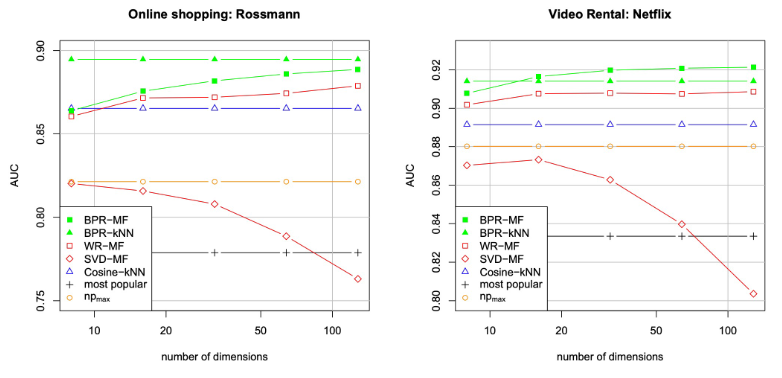

- `ALS`보단 안쓰이지만 학술적으로 가치가 매우 높습니다.
- 또한 `P`와 `Q`를 병렬화된 연산이 가능해 `Spark`를 통해 성능을 높일 수 있습니다.

**요약**
- `Implicit Feedback` 데이터만을 활용해 아이템 간의 선호도를 도출합니다.
- 최대 사후 확률 추정`Maximum A Posterior` 방법을 통해 파라미터를 최적화할 수 있습니다.
- `LEARNBPR`이라는 Bootstrap 기반의 `SGD`를 활용해 파라미터를 업데이트합니다.
- `Matrix Factorization`에 `BPR` 최적화를 적용한 결과는 성능이 우수합니다.

## Annoy를 활용한 서빙

## MF 서빙 이슈

- 특정 유저 $u$에게 추천을 제공하기 위해선 해당 유저 벡터와 후보 아이템 벡터들의 연산이 필요합니다.
 - $\hat{r}_{ui} = p_{u}^{T}q_{i}$ for $i \in I$, 추천 스코어는 두 벡터의 내적`Inner product`
 - 후보 아이템들에 대해서 `rating` 값을 구하고 내림차순 정렬해서 상위 아이템을 추천하는 방식
- 특정 아이템 $i$와 비슷한 아이템 $i'$을 추천하기 위해서 해당 아이템 벡터와 후보 아이템 벡터의 유사도 연산이 필요합니다.
 - 특정 아이템 $i$에 대해서 `유사도` $cos(q_{i}, q_{i}')$을 구해서 내림차순 정렬하고 상위 아이템 추천
- 하지만 만약 아이템의 개수가 엄청 많다면, 모든 아이템에 대해서 스코어를 계산하게 될 경우 오랜 시간과 높은 연산량이 필요합니다. 이는 실시간 `서빙`에 있어서 매우 취약합니다.
- 많은 후보 아이템 가운데 스코어가 가장 큰 n개의 아이템을 '유사'하게 추출하기 위해서 나온 것이 `Annoy`를 활용한 `서빙`입니다.

## [Annoy](https://github.com/spotify/annoy)

- 수많은 데이터가 있는 n차원 벡터 공간에서 주어진 벡터와 가장 '유사'한 벡터들을 찾는 알고리즘입니다.
 - Spotify에서 추천 시스템의 `nearest-neighbor` 문제를 해결하기 위해 개발

**작동 방식**
1. 벡터 공간을 여러개 권역으로 나누어`split` `binary tree` 형태로 구성합니다.
2. 주어진 벡터가 속한 공간을 `tree search`로 찾고, 그 권역 안에서만 `nearest-neighbor` 연산을 수행합니다.
3. 결과적으로 `binary tree` 최하위 자식에서 비슷한 아이템들을 찾게 됩니다.

**제공 유사도 기준**
- Angular distance = $\sqrt{2(1 - cos(i, i'))}$
- Dot Product : 유저에게 아이템을 추천할 땐 해당 수치가 가장 큰 것을 추천


#### Annoy 사용 예시

- 유저에게 아이템 추천
 - 주어진 유저 벡터에 대해서 내적`Dot Product`이 최대가 되는 아이템 벡터 N개를 찾아 추천 $\to$ `유사도` : 내적`Dot Product`
- 아이템과 비슷한 다른 아이템 추천
 - 주어진 아이템 벡터와 가장 비슷한 아이템 벡터 N개를 찾아서 추천 $\to$ `유사도` : `Angular Distance`



**Note**
- 실제론 [nmslib](https://github.com/nmslib/nmslib) 또는 [faiss](https://github.com/facebookresearch/faiss)를 더 사용합니다.
- 매우 어려운 개념이긴 하나, 이해 전에 실사용해보는 개발자도 많은 편입니다.
- 위 개념은 Approximate Nearest-neighborhood`ANN`이라 하여 `데이터 사이언스`에 더 가까운 개념입니다.
- [ANN Benchmark](http://ann-benchmarks.com/)